----------------------------
#### pearson's correlation
-----------------------
- meant for continuous and linear features

In [22]:
from math import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)

#### Example

In [23]:
study_hours    = np.array([2,  4, 6, 8, 10])
sleeping_hours = np.array([10, 8, 6, 4,  2])

In [24]:
np.cov(study_hours, sleeping_hours)

array([[ 10., -10.],
       [-10.,  10.]])

In [25]:
np.corrcoef(study_hours, sleeping_hours)

array([[ 1., -1.],
       [-1.,  1.]])

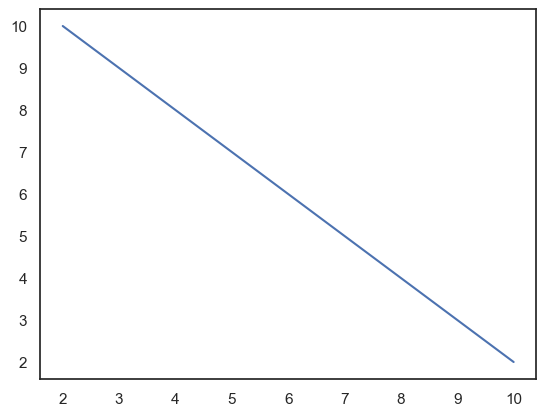

In [26]:
plt.plot(study_hours, sleeping_hours);

#### correlation coeff

**Positive Correlation**

In [8]:
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

np.corrcoef(x, y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

The correlation is 0.815, a strong positive correlation, let’s take a look at a scatter chart.

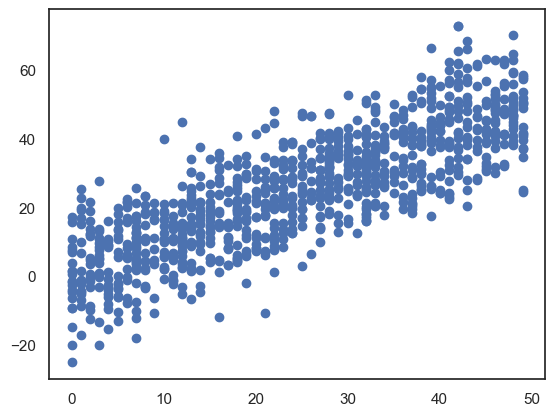

In [9]:
plt.scatter(x, y);

**Negative Correlation**

In [10]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

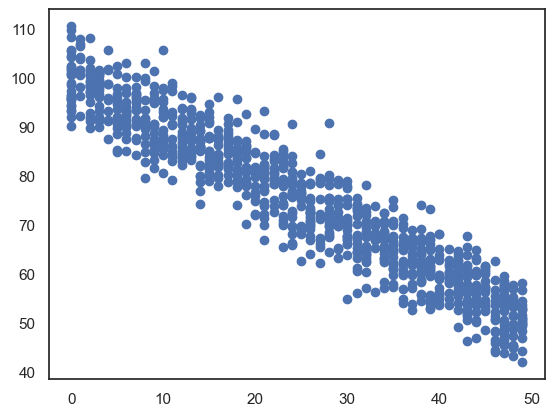

In [12]:
plt.scatter(x, y);

**No/Weak Correlation**
What if there is no correlation between x and y?

In [13]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

Here we see a very small value for the correlation between x and y, indicating no correlation.

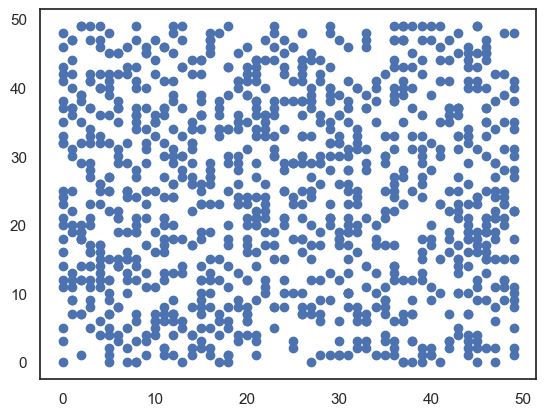

In [14]:
plt.scatter(x, y);

#### Correlation Matrix

In [15]:
df = pd.DataFrame({'Col1': np.random.randint(0, 50, 1000)})

# positively correlated with 'a'
df['Col2'] = df['Col1'] + np.random.normal(0, 10, 1000) 

# negatively correlated with 'a'
df['Col3'] = 100 - df['Col1'] + np.random.normal(0, 5, 1000) 

# not correlated with 'a'
df['Col4'] = np.random.randint(0, 50, 1000) 

In [16]:
df.shape

(1000, 4)

In [17]:
df.corr()

,Col1,Col2,Col3,Col4
Col1,1.000000,0.825361,-0.948845,0.009802
Col2,0.825361,1.000000,-0.789391,0.011852
Col3,-0.948845,-0.789391,1.000000,-0.003228
Col4,0.009802,0.011852,-0.003228,1.000000


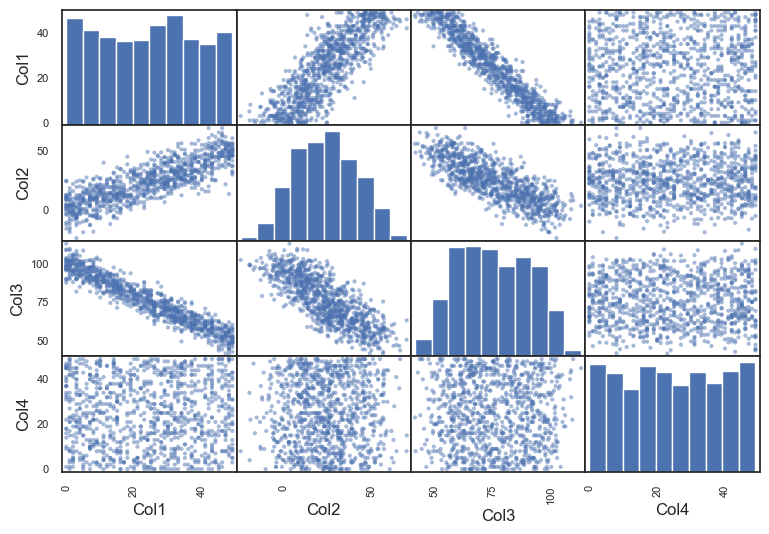

In [18]:
pd.plotting.scatter_matrix(df, figsize=(9, 6));

<Figure size 1200x600 with 0 Axes>

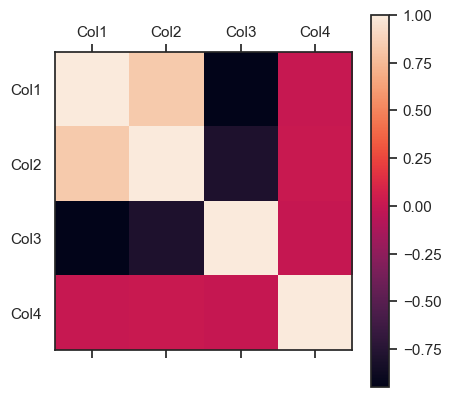

In [21]:
plt.figure(figsize=(12, 6))

plt.matshow(df.corr())

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar();

In [34]:
# Create dummy data for a more non-linear relationship
x = np.linspace(1, 10, 100)
y = x**3 + np.random.normal(scale=20, size=100)  # More non-linear relationship with added noise


In [35]:
# Create a DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

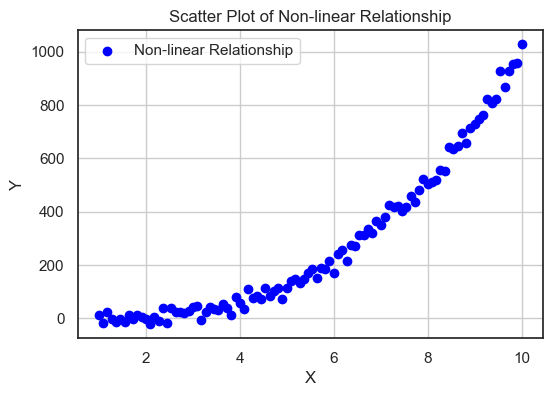

In [36]:
# Plot the data
plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['Y'], label='Non-linear Relationship', color='blue')
plt.title('Scatter Plot of Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [37]:
# Calculate Pearson's correlation coefficient
pearson_corr = df['X'].corr(df['Y'], method='pearson')

In [38]:
# Calculate Spearman's correlation coefficient
spearman_corr = df['X'].corr(df['Y'], method='spearman')

In [39]:
# Display the correlation coefficients
print(f"Pearson's Correlation Coefficient: {pearson_corr}")
print(f"Spearman's Correlation Coefficient: {spearman_corr}")

Pearson's Correlation Coefficient: 0.9347318533983713
Spearman's Correlation Coefficient: 0.9843624362436242


#### impact of outliers

In [40]:
# Create dummy data for a more non-linear relationship with an outlier
x = np.linspace(1, 10, 100)
y = x**3 + np.random.normal(scale=20, size=100)  # More non-linear relationship with added noise

y[80] = 200  # Introduce an outlier

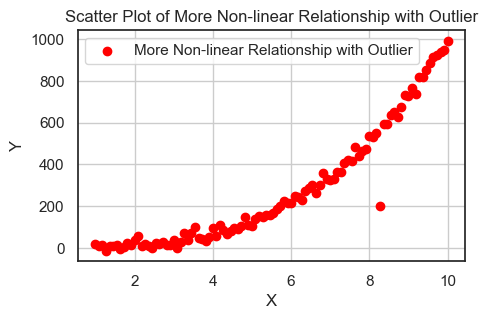

In [46]:
# Plot the data with an outlier
plt.figure(figsize=(5, 3))
plt.scatter(df['X'], df['Y'], label='More Non-linear Relationship with Outlier', color='red')
plt.title('Scatter Plot of More Non-linear Relationship with Outlier')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [47]:
# Create a DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

In [48]:
# Calculate Pearson's correlation coefficient
pearson_corr = df['X'].corr(df['Y'], method='pearson')

In [49]:
# Calculate Spearman's correlation coefficient
spearman_corr = df['X'].corr(df['Y'], method='spearman')

In [50]:
# Display the correlation coefficients
print(f"Pearson's Correlation Coefficient: {pearson_corr}")
print(f"Spearman's Correlation Coefficient: {spearman_corr}")

Pearson's Correlation Coefficient: 0.9230472244289064
Spearman's Correlation Coefficient: 0.9800180018001798


Pearson's correlation is sensitive to outliers, and the coefficient may be influenced by the presence of such extreme values. 

In contrast, Spearman's correlation is less affected by outliers.